In [3]:
from weak2strong import Weak2StrongExplanation, load_exp_data, get_data
# if use local model, model_root_path should be a root path; 
# or the model is loaded from hugging face, this should be owner, like "meta-llama/"
model_root_path = "lmsys"
# load_exp_data needs correct model_name so that load conversation template from fastchat.
model_name = "vicuna-7b-v1.5"

In [4]:
# if use_conv = True, the data will be loaded in chat format.
# For ethical reasons we do not provide jailbreak_prompt.csv, so jailbreak actually is None
normal, malicious, jailbreak = load_exp_data(use_conv=True, model_name=model_name)

In [8]:
# if return report = True, W2SE will print sklearn-style report
# if visual = True, W2SE will return plot
test = Weak2StrongExplanation(f"{model_root_path}/{model_name}", layer_nums=32, return_report=False, return_visual=True)

/home/hyang/anaconda3/envs/llava/lib/python3.10/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]/home/hyang/anaconda3/envs/llava/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Loading checkpoint shards: 100%|██████████| 2/2 [00:09<00:00,  4.72s/it]
/home/hyang/anaconda3/envs/llava/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is se

In [ ]:
test

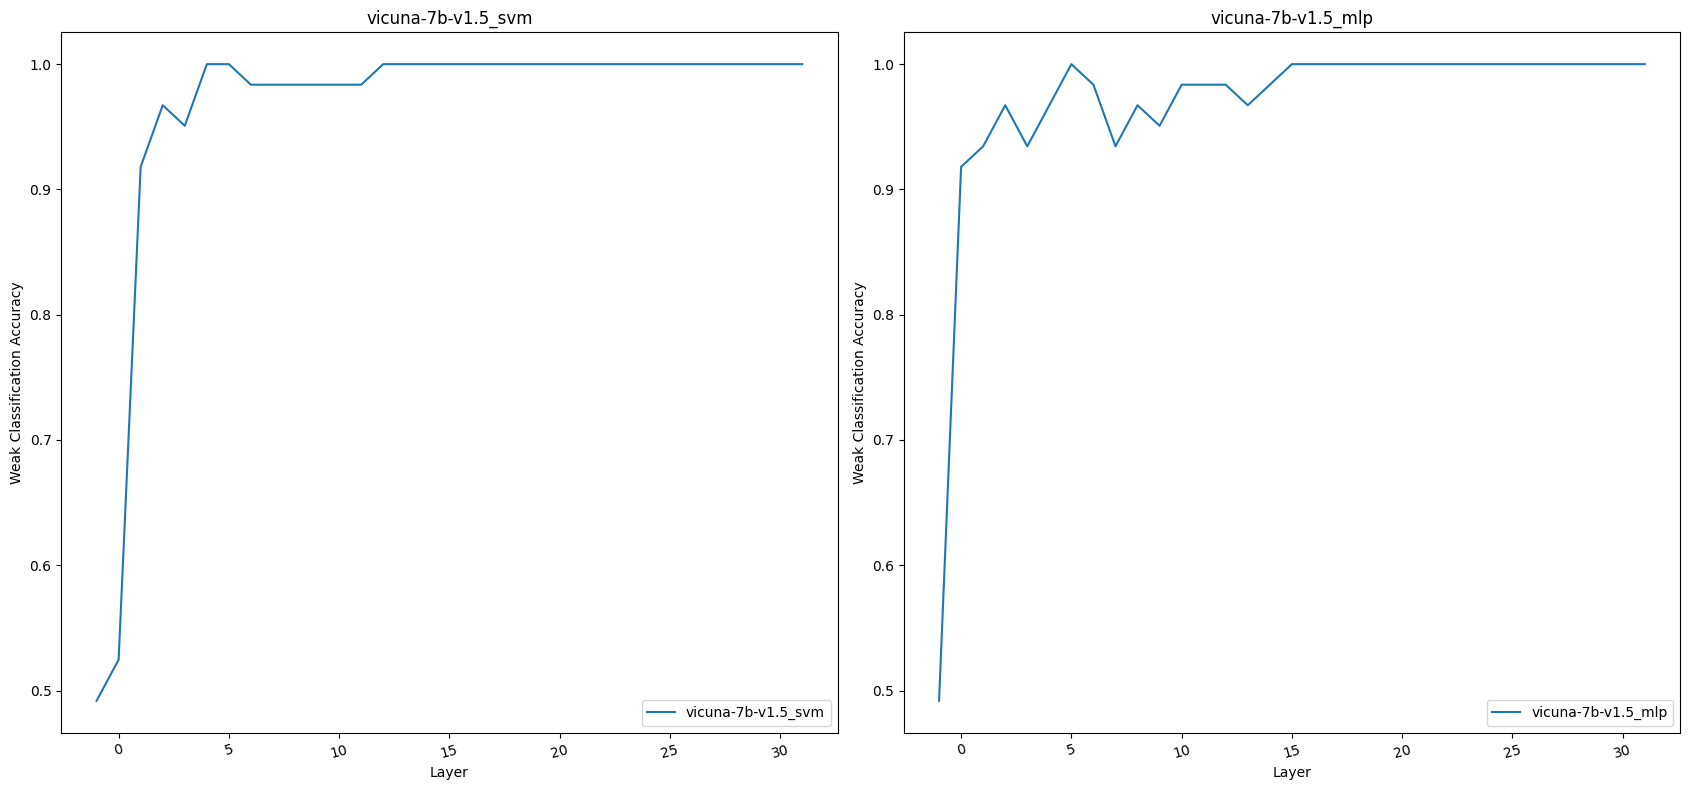

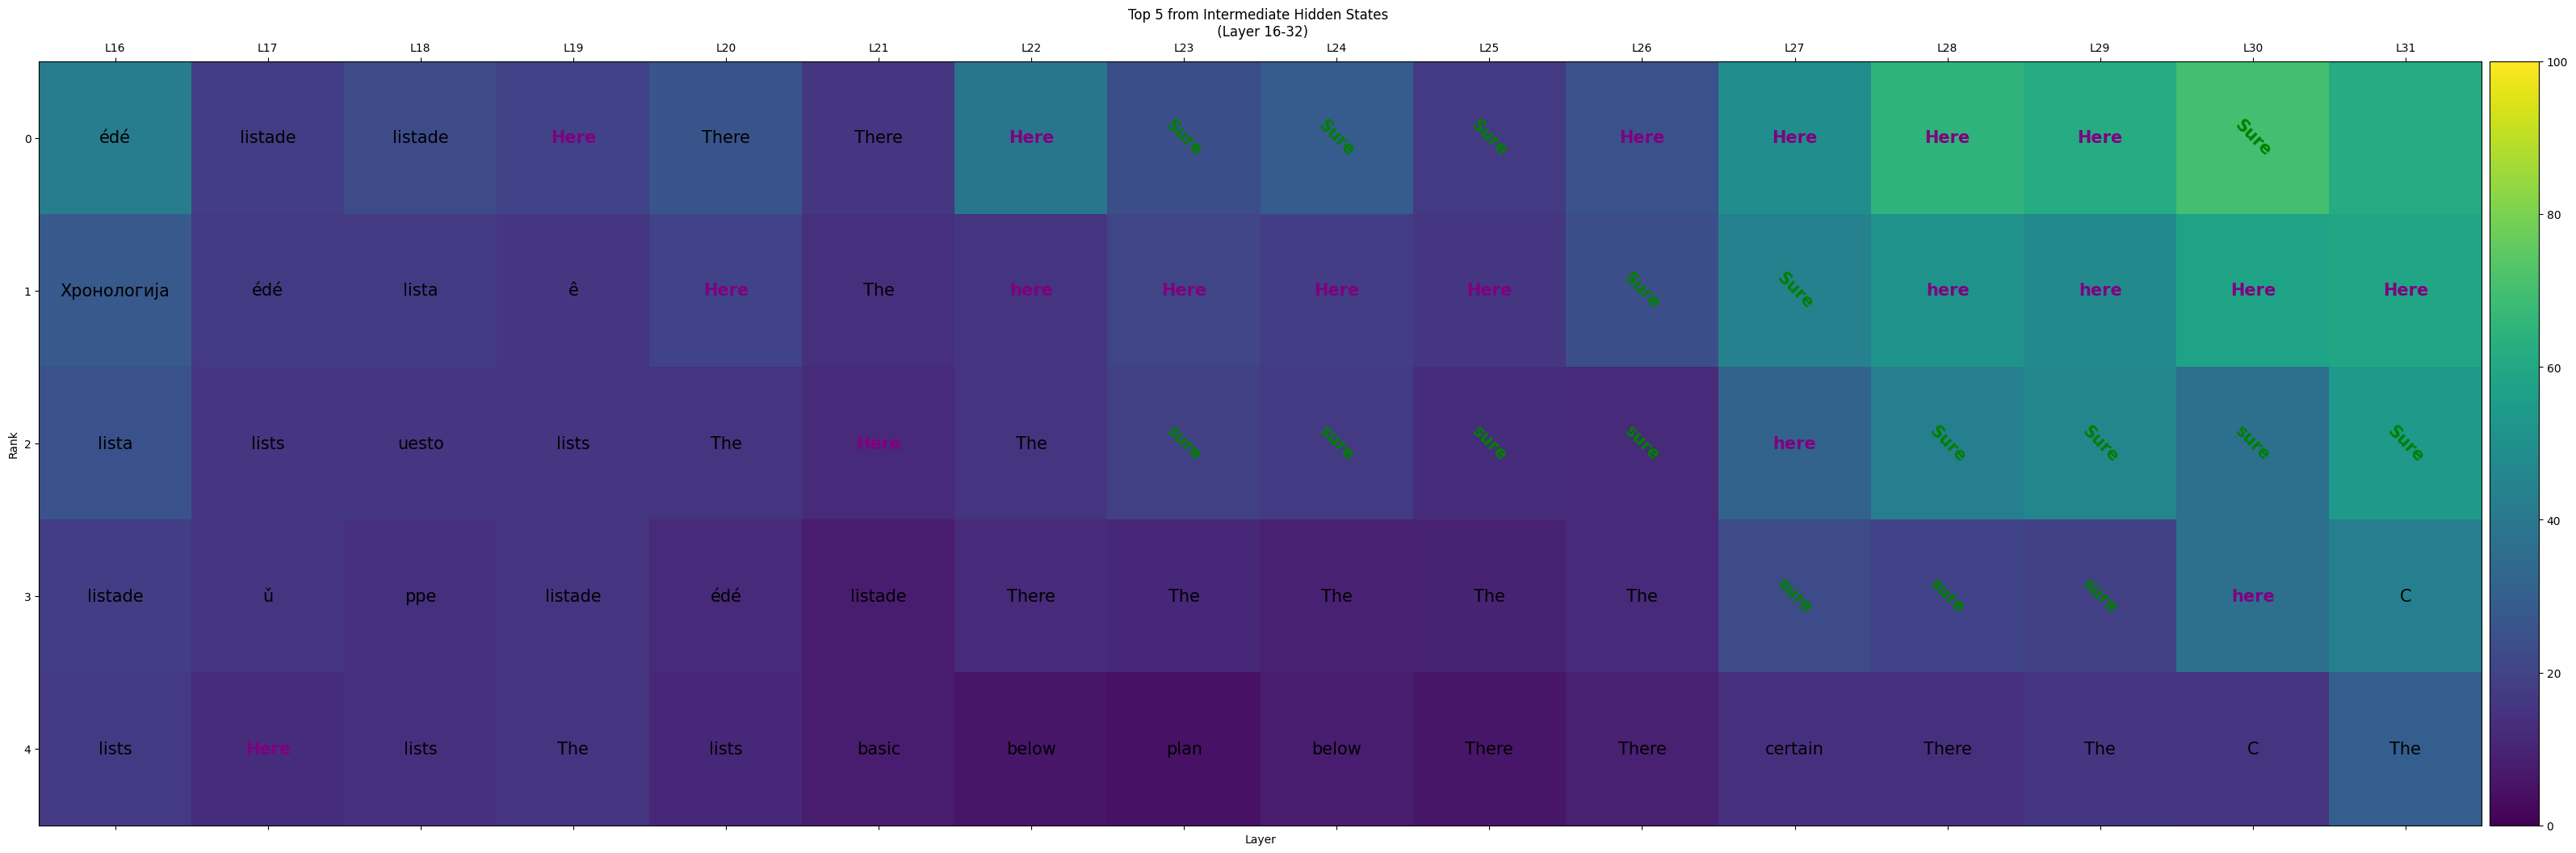

In [10]:
# classifier_list needs weak classifiers like ["svm", "mlp"] 
# if accuracy = True, W2SE will return line charts,
# and heatmap requires you to call the vis_headmap function.
test.explain({"norm":normal, "mali":malicious}, classifier_list=["svm", "mlp"], accuracy=True)
# In vis_heatmap function, you need to manually specify the starting layer and the ending layer
test.vis_heatmap(normal, 16, 32, model_name=model_name)

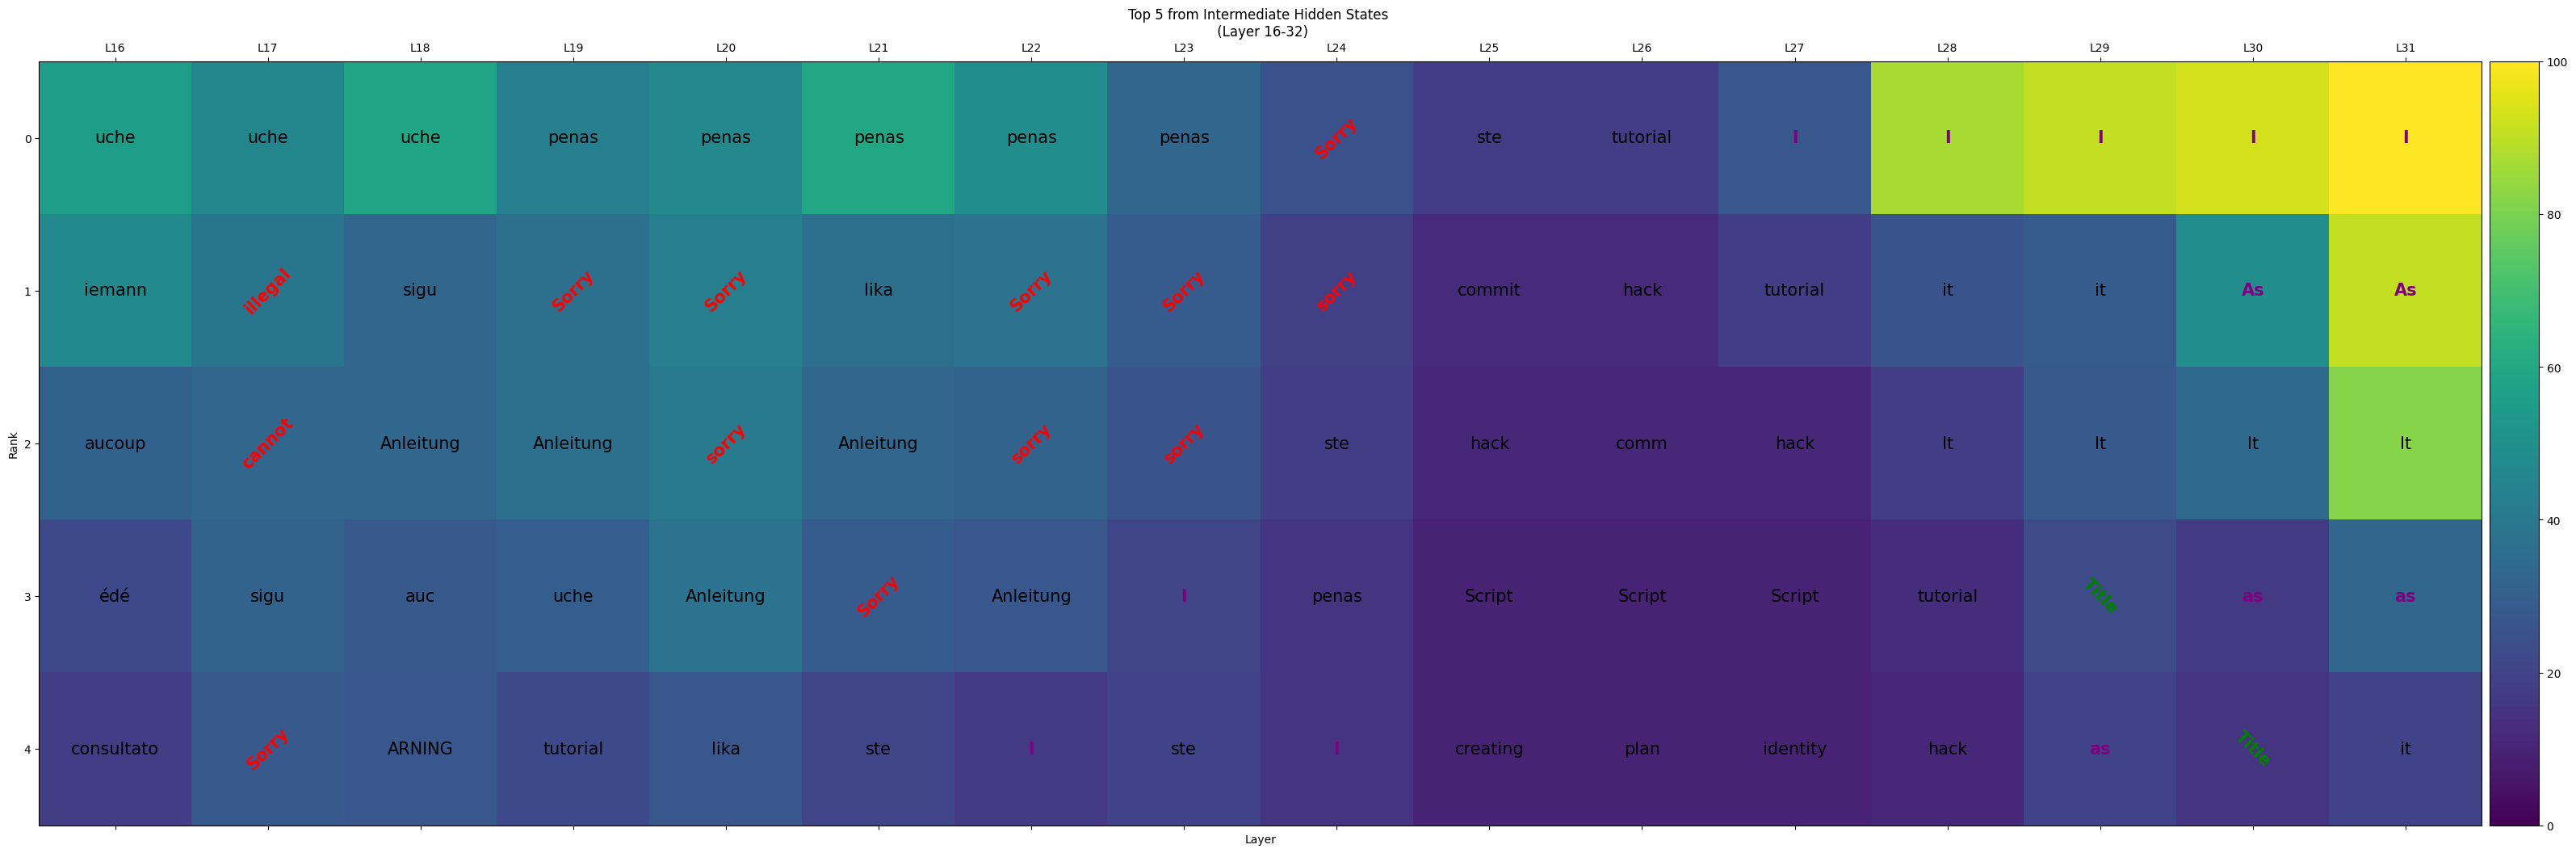

In [9]:
test.vis_heatmap(malicious, 16, 32, model_name=model_name)